<a href="https://colab.research.google.com/github/vutukuri-pujitha30/Project/blob/main/Lung_Cancer_Prediction_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving survey lung cancer.csv to survey lung cancer.csv
<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             

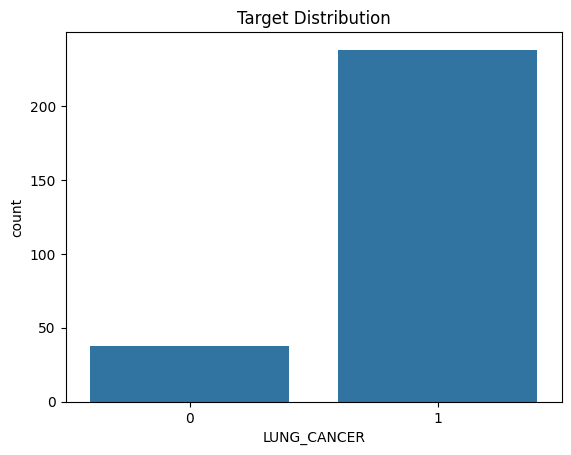

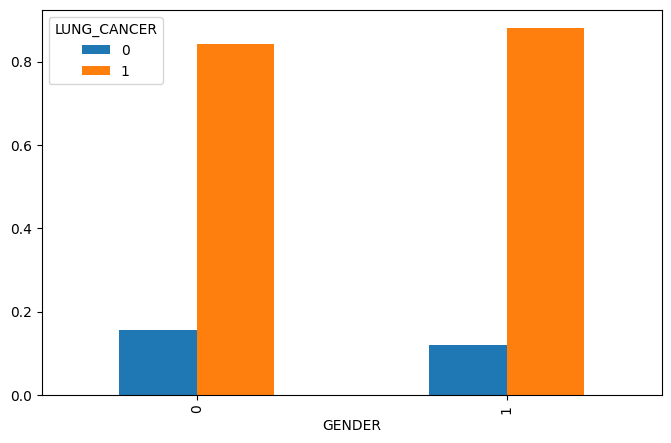

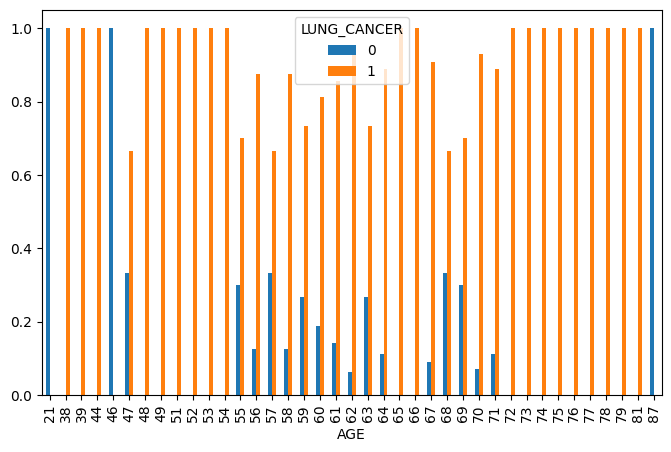

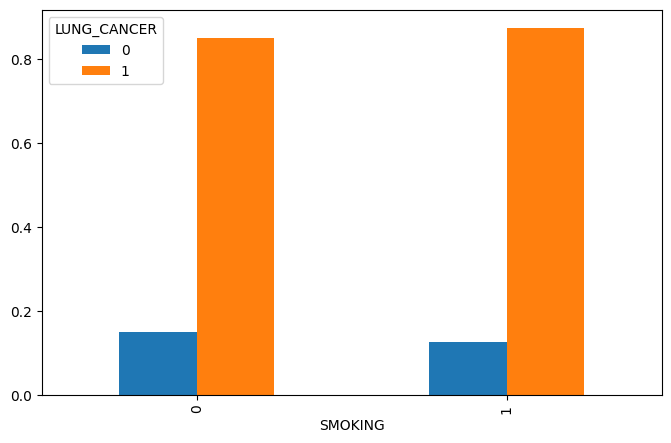

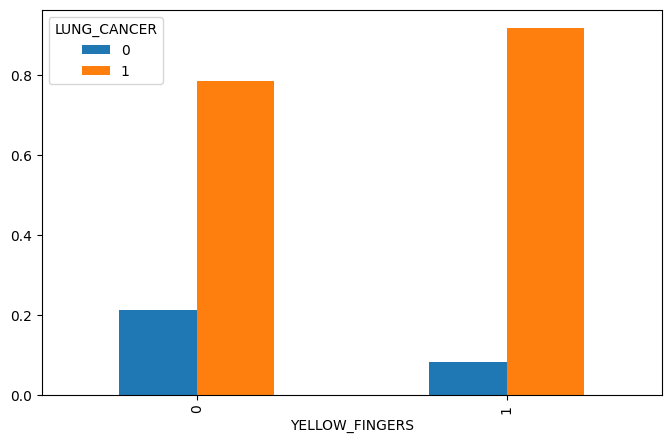

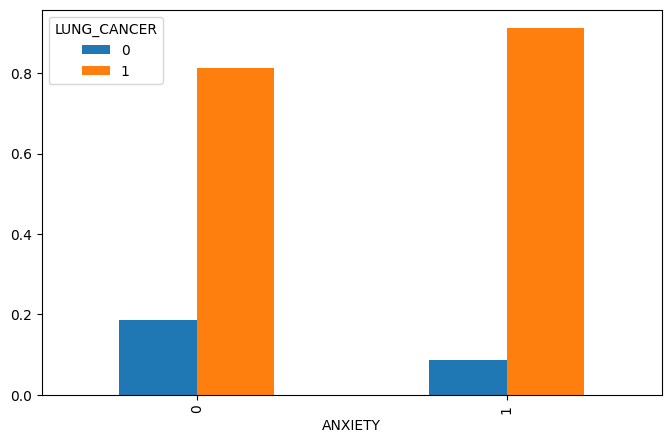

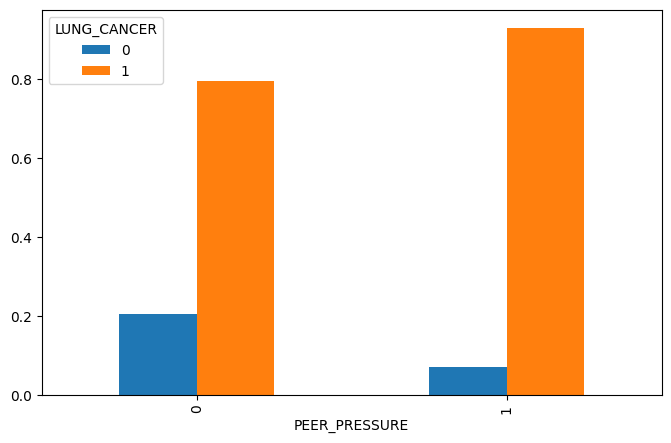

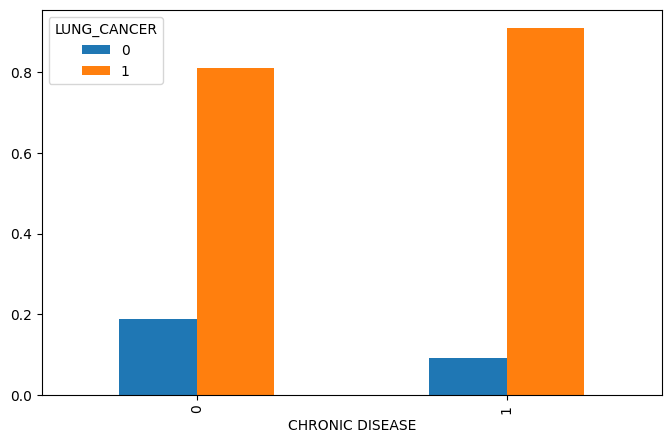

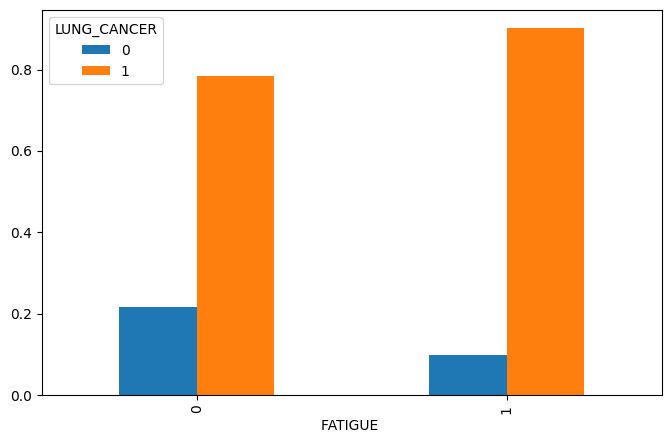

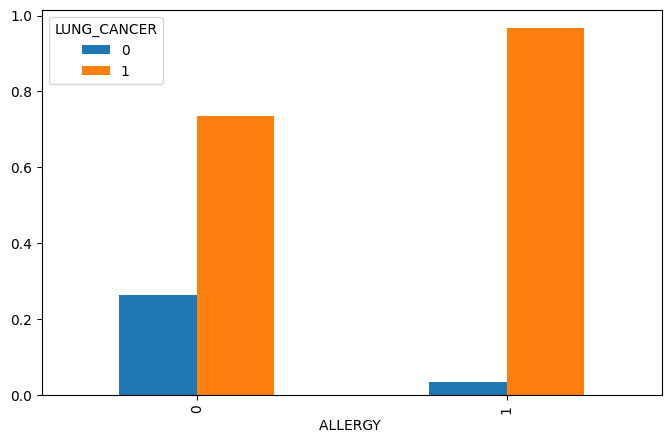

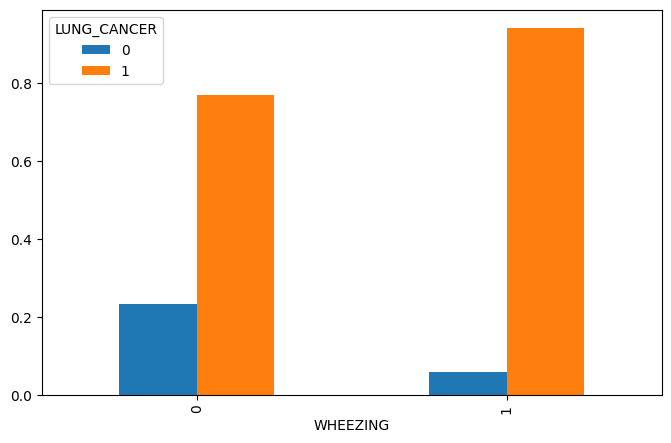

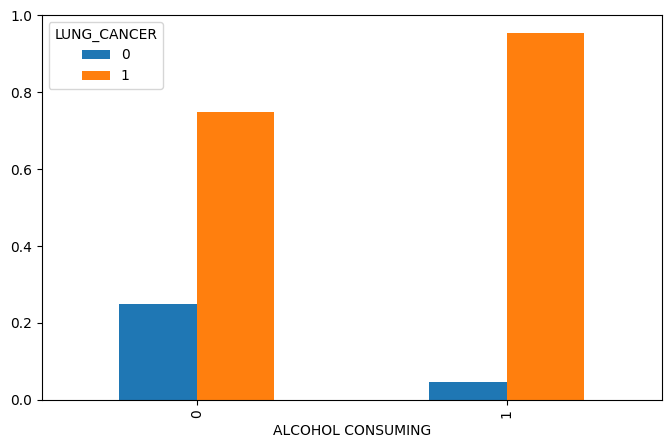

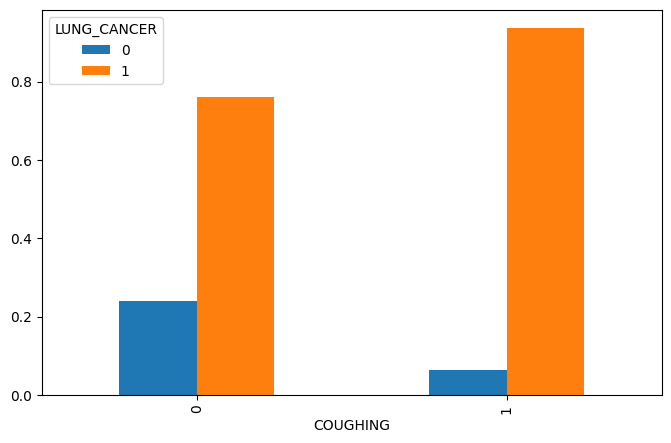

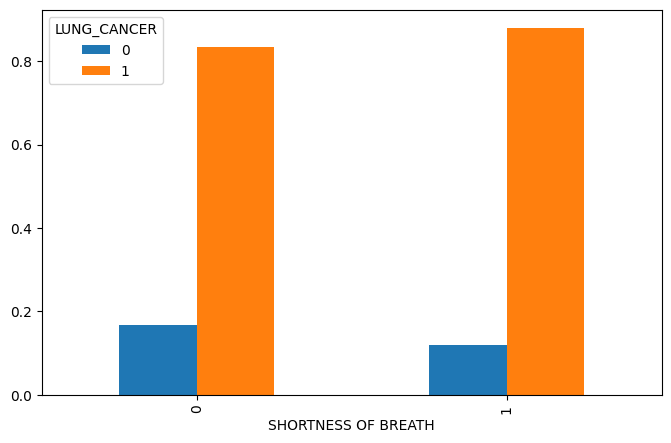

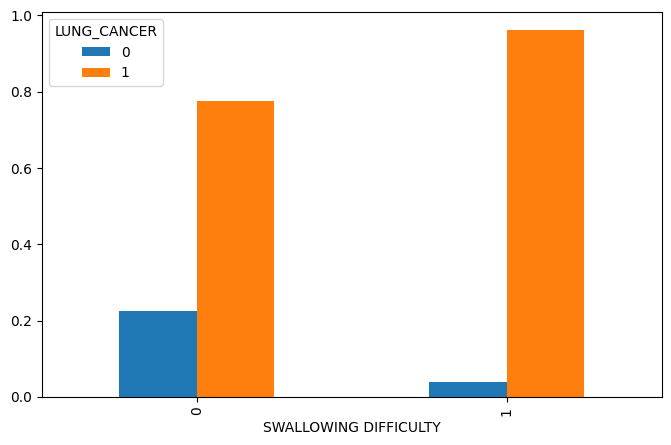

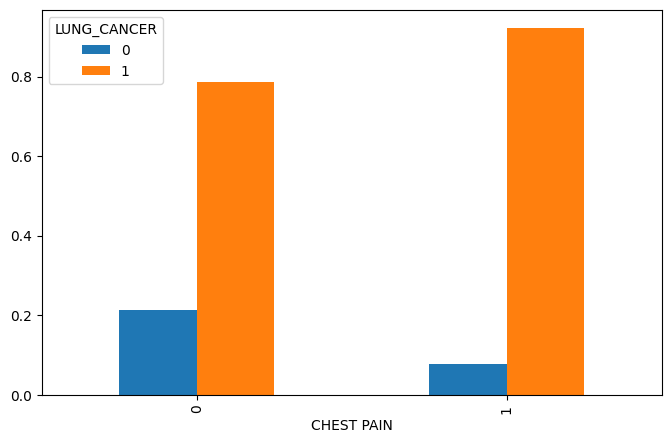

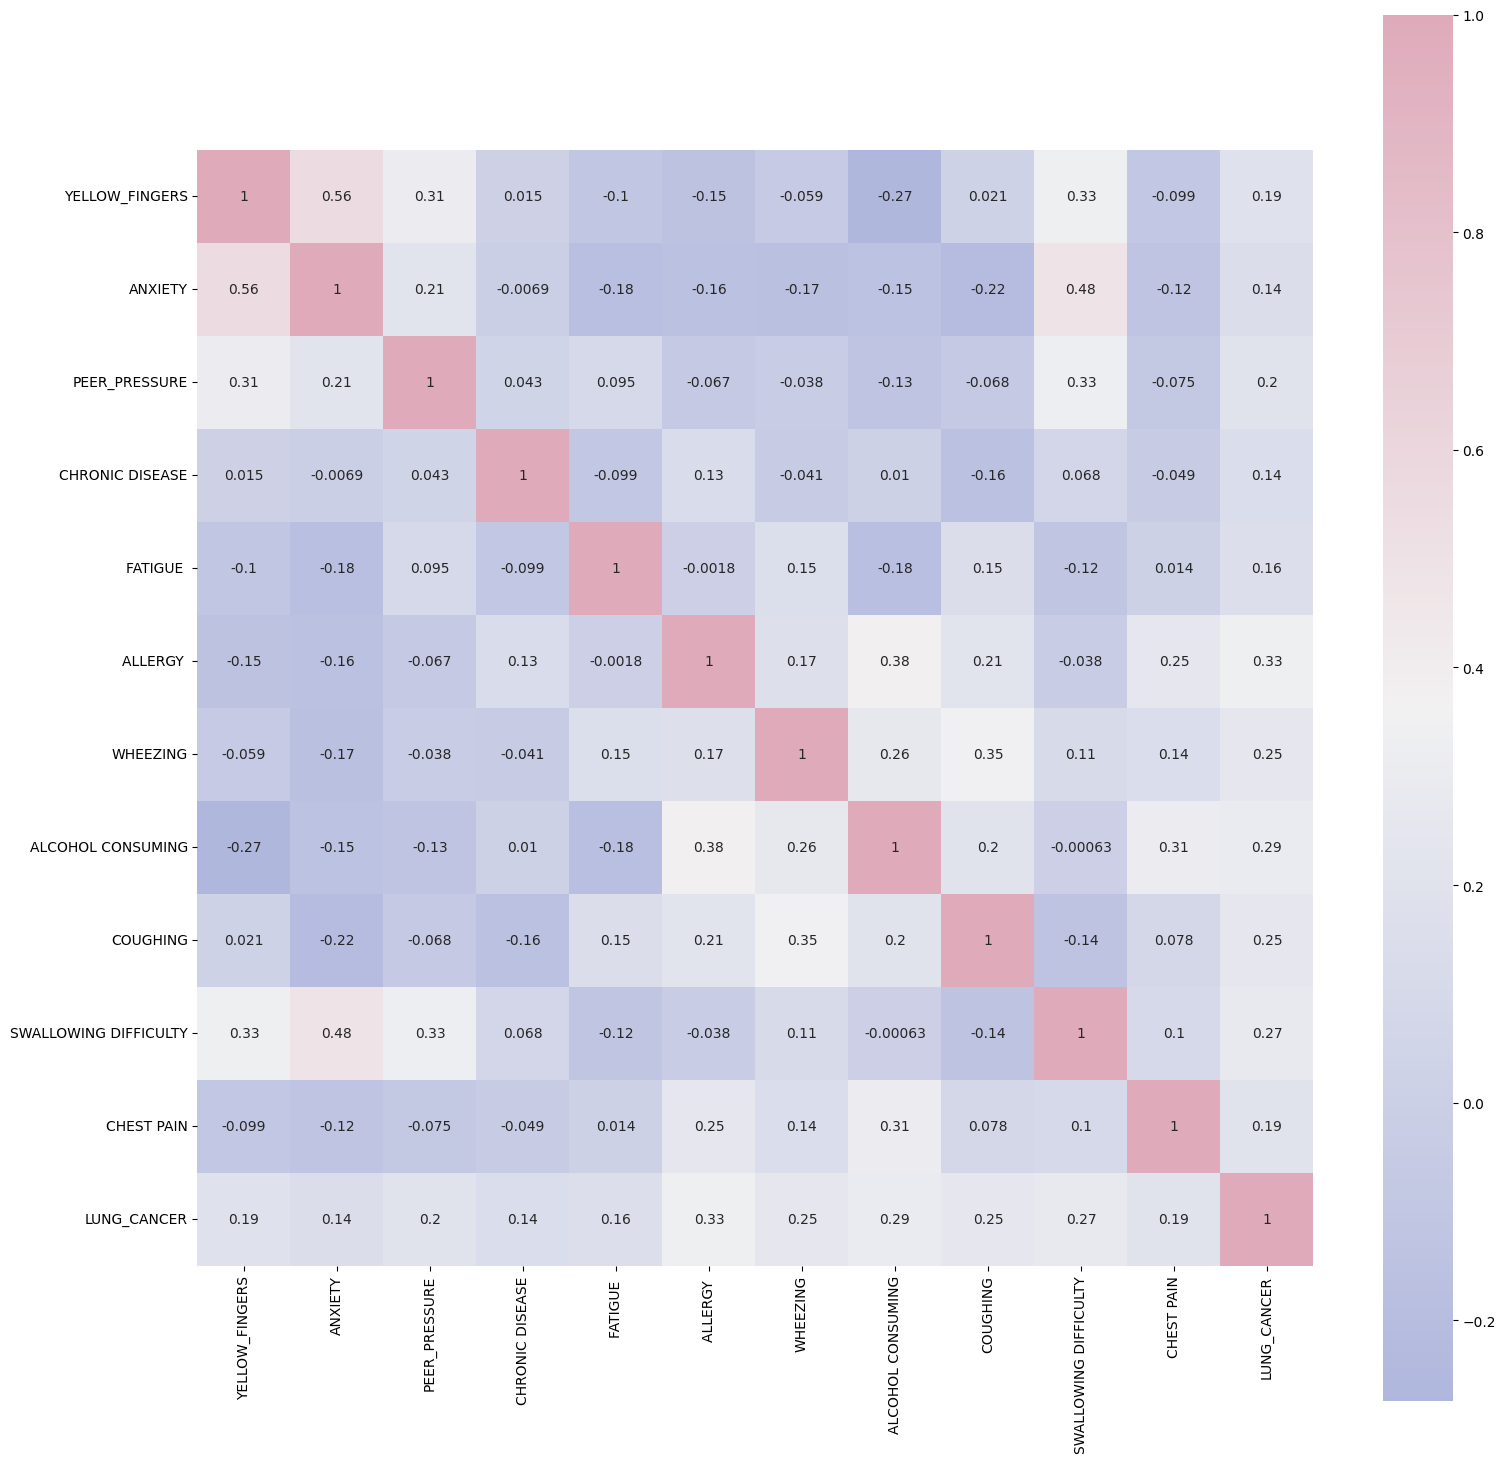

477

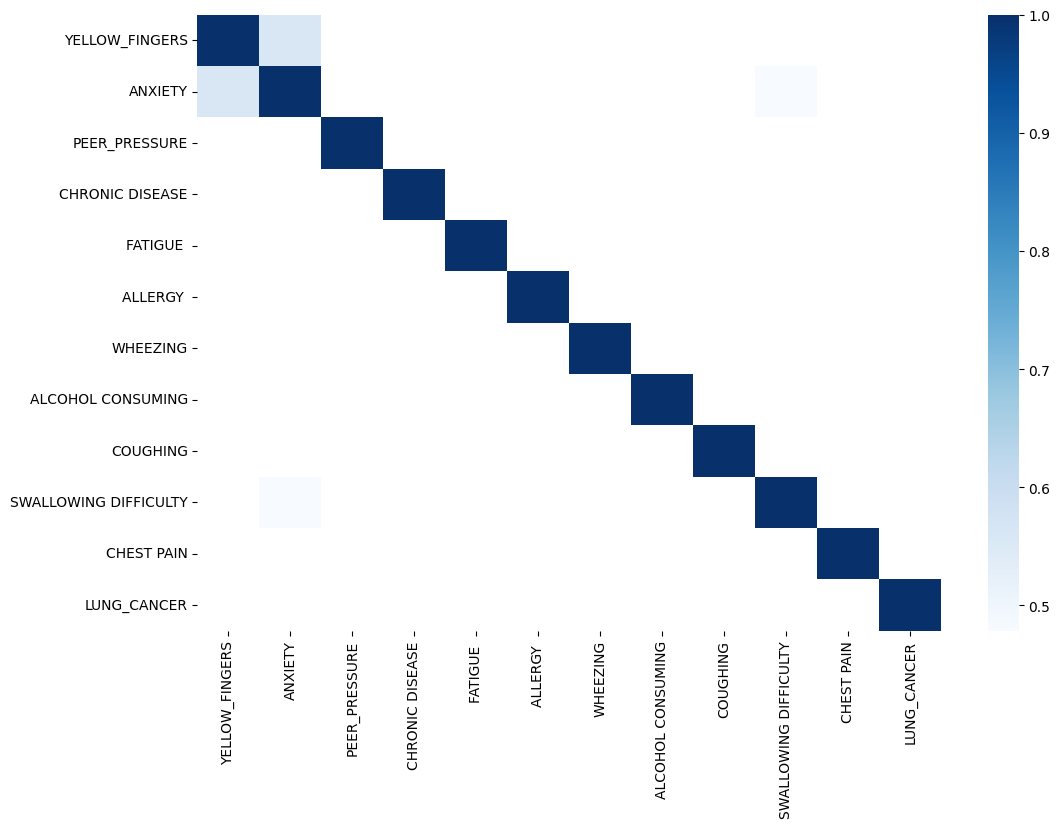

In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# UPLOADING CSV FILE
from google.colab import files
uploaded = files.upload()
data=pd.read_csv("survey lung cancer.csv")
data
data.shape

# CHECKING FOR DUPLICATE VALUES
data.duplicated().sum()
# REMOVING THE DUPLICATES
data=data.drop_duplicates()

# CHECKING FOR NULL VALUES
data.isnull().sum()

data.info()

data.describe()

#In this dataset, GENDER & LUNG_CANCER attributes are in object data type. So, let's convert them to numerical values using LabelEncoder from sklearn.
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
data['GENDER']=le.fit_transform(data['GENDER'])
data['LUNG_CANCER']=le.fit_transform(data['LUNG_CANCER'])
data['SMOKING']=le.fit_transform(data['SMOKING'])
data['YELLOW_FINGERS']=le.fit_transform(data['YELLOW_FINGERS'])
data['ANXIETY']=le.fit_transform(data['ANXIETY'])
data['PEER_PRESSURE']=le.fit_transform(data['PEER_PRESSURE'])
data['CHRONIC DISEASE']=le.fit_transform(data['CHRONIC DISEASE'])
data['FATIGUE ']=le.fit_transform(data['FATIGUE '])
data['ALLERGY ']=le.fit_transform(data['ALLERGY '])
data['WHEEZING']=le.fit_transform(data['WHEEZING'])
data['ALCOHOL CONSUMING']=le.fit_transform(data['ALCOHOL CONSUMING'])
data['COUGHING']=le.fit_transform(data['COUGHING'])
data['SHORTNESS OF BREATH']=le.fit_transform(data['SHORTNESS OF BREATH'])
data['SWALLOWING DIFFICULTY']=le.fit_transform(data['SWALLOWING DIFFICULTY'])
data['CHEST PAIN']=le.fit_transform(data['CHEST PAIN'])
data['LUNG_CANCER']=le.fit_transform(data['LUNG_CANCER'])

data

data.info()

sns.countplot(x="LUNG_CANCER", data=data,)
plt.title('Target Distribution');

data['LUNG_CANCER'].value_counts()
# Function for the Plotting
def plot(col, data=data):
    return data.groupby(col)['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,5))

plot('GENDER')

plot('AGE')

plot('SMOKING')

plot('YELLOW_FINGERS')

plot('ANXIETY')

plot('PEER_PRESSURE')

plot('CHRONIC DISEASE')

plot('FATIGUE ')

plot('ALLERGY ')

plot('WHEEZING')

plot('ALCOHOL CONSUMING')

plot('COUGHING')

plot('SHORTNESS OF BREATH')

plot('SWALLOWING DIFFICULTY')

plot('CHEST PAIN')
new_data=data.drop(columns=['GENDER','AGE', 'SMOKING', 'SHORTNESS OF BREATH'])
new_data

# CORRELATION
cn=new_data.corr()
cn

#CORRELATION
cmap=sns.diverging_palette(260,-10,s=50, l=75, n=6,as_cmap=True)  #Correlation
plt.subplots(figsize=(18,18))
sns.heatmap(cn,cmap=cmap,annot=True, square=True)
plt.show()

kot = cn[cn>=.40]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Blues")

# Feature Engineering
new_data['ANXYELFIN']=new_data['ANXIETY']*new_data['YELLOW_FINGERS']
new_data

# Splitting Independent and Dependent Variables
X = new_data.drop('LUNG_CANCER', axis = 1)
y = new_data['LUNG_CANCER']

#Balancing the Target Distribution
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X, y = adasyn.fit_resample(X, y)

len(X)

In [2]:
data.shape

(276, 16)

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

gnb_predict = gnb.predict(X_test)
gnb_predict

gnb_cr=classification_report(y_test,gnb_predict)
print(gnb_cr)

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        64
           1       0.88      0.95      0.91        56

    accuracy                           0.92       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.92      0.92       120



In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

rfc = RandomForestClassifier(n_estimators=100, random_state=42)

rfc.fit(X_train, y_train)

rfc_predict = rfc.predict(X_test)
rfc_predict

rf_cr=classification_report(y_test, rfc_predict)
print(rf_cr)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        64
           1       0.98      0.98      0.98        56

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

combined_pred = []
for i in range(len(X_test)):
    if gnb_predict[i] == rfc_predict[i]:
        combined_pred.append(gnb_predict[i])
    else:
        combined_pred.append(rfc_predict[i])

combined_pred

naive_forest=classification_report(y_test,combined_pred)
print(naive_forest)


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.98      1.00      0.99        44

    accuracy                           0.99        96
   macro avg       0.99      0.99      0.99        96
weighted avg       0.99      0.99      0.99        96



In [6]:
print("Accuracy of Gaussain NB Model: 92%")
print("Accuracy of Random Forest Model:98%")
print("Accuracy of Naive Forest Model:99%")

Accuracy of Gaussain NB Model: 92%
Accuracy of Random Forest Model:98%
Accuracy of Naive Forest Model:99%


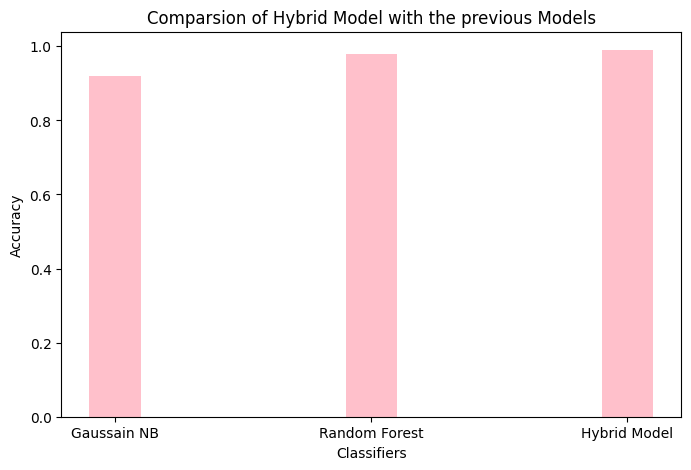

In [7]:
accuracy_scores={"Gaussain NB":0.92,"Random Forest":0.98,"Hybrid Model":0.99}
classifiers = list(accuracy_scores.keys())
accuracy = list(accuracy_scores.values())

fig = plt.figure(figsize = (8,5))
# creating the bar plot
plt.bar(classifiers, accuracy, color ='pink',width = 0.2)

plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title("Comparsion of Hybrid Model with the previous Models")
plt.show()


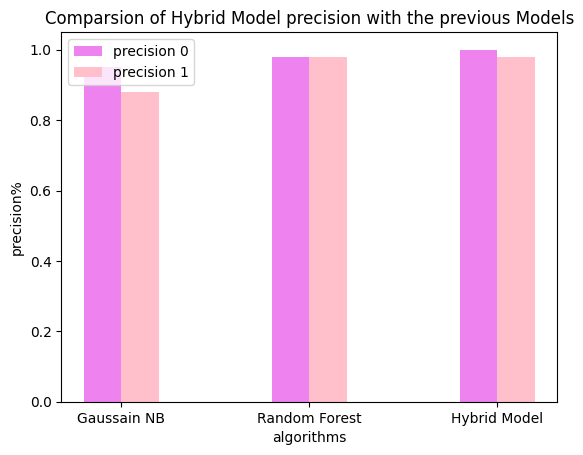

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Sample Data
categories= ["Gaussain NB","Random Forest","Hybrid Model"]
pre_0= [0.95,0.98,1.00]
pre_1= [0.88,0.98,0.98]

# Create bar plot
bar_width = 0.2
index = np.arange(len(categories))

plt.bar(index,pre_0, bar_width,color="violet", label='precision 0')
plt.bar(index + bar_width,pre_1, bar_width,color="pink",label='precision 1')

# Adding labels
plt.xlabel('algorithms')
plt.ylabel('precision%')
plt.title('Comparsion of Hybrid Model precision with the previous Models')
plt.xticks(index + bar_width / 2, categories)
plt.legend()

# Show plot
plt.show()

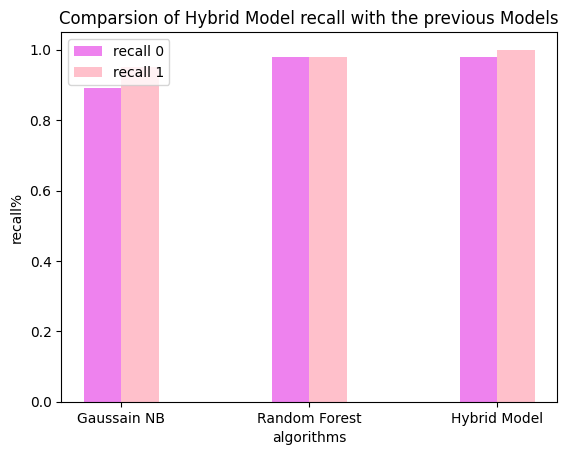

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Sample Data
categories= ["Gaussain NB","Random Forest","Hybrid Model"]
rec_0= [0.89,0.98,0.98]
rec_1= [0.95,0.98,1.00]

# Create bar plot
bar_width = 0.2
index = np.arange(len(categories))

plt.bar(index,rec_0, bar_width,color="violet", label='recall 0')
plt.bar(index + bar_width,rec_1, bar_width,color="pink",label='recall 1')

# Adding labels
plt.xlabel('algorithms')
plt.ylabel('recall%')
plt.title('Comparsion of Hybrid Model recall with the previous Models')
plt.xticks(index + bar_width / 2, categories)
plt.legend()

# Show plot
plt.show()

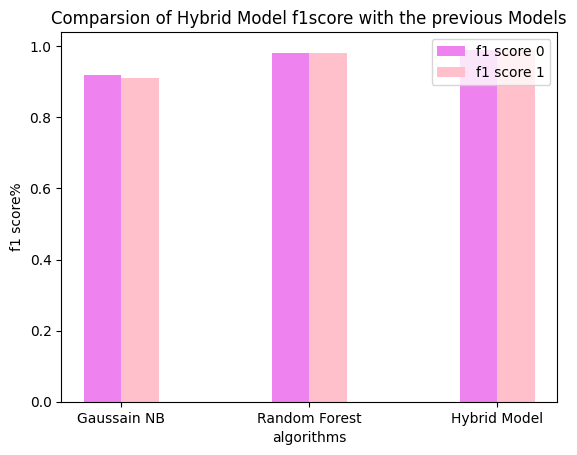

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Sample Data
categories= ["Gaussain NB","Random Forest","Hybrid Model"]
f1_0= [0.92,0.98,0.99]
f1_1= [0.91,0.98,0.99]

# Create bar plot
bar_width = 0.2
index = np.arange(len(categories))

plt.bar(index,f1_0, bar_width,color="violet", label='f1 score 0')
plt.bar(index + bar_width,f1_1, bar_width,color="pink",label='f1 score 1')

# Adding labels
plt.xlabel('algorithms')
plt.ylabel('f1 score%')
plt.title('Comparsion of Hybrid Model f1score with the previous Models')
plt.xticks(index + bar_width / 2, categories)
plt.legend()

# Show plot
plt.show()